# Heart Disease Detection - Data Preparation (CRISP-DM Stage 1)

This notebook covers the **Baseline Modelling phase** of the CRISP-DM methodology for the Heart Disease Detection project.

## Stage 1 Constraints (Allowed Operations Only)
- ✅ Dummy Baseline: Establish a reference point using the most frequent class.
- ✅ Classical Models: Simple machine learning models (Logistic Regression, Decision Tree).
- ✅ Default Settings: All models must use default parameter settings only.
- ❌ No Hyperparameter Tuning: No grid search or manual optimization.
- ❌ No Deep Learning or Model Ensembling.

## 1. Import Required Libraries

In [ ]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn for modelling and evaluation
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (accuracy_score, f1_score, classification_report, 
                             confusion_matrix, ConfusionMatrixDisplay)

# Set random state for reproducibility
RANDOM_STATE = 42

print("Libraries imported successfully!")

Libraries imported successfully!


## 2. Load Prepared Dataset

Load the CSV files generated during the Data Preparation phase.

In [2]:
# Load the prepared data
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
y_train = pd.read_csv('y_train.csv').values.ravel()
y_test = pd.read_csv('y_test.csv').values.ravel()

print("============================================================")
print("DATASET LOADED FOR MODELLING")
print("============================================================")
print(f"Training set: {X_train.shape[0]:,} samples, {X_train.shape[1]} features")
print(f"Test set:     {X_test.shape[0]:,} samples")

DATASET LOADED FOR MODELLING
Training set: 353,431 samples, 76 features
Test set:     88,414 samples


## 3. Baseline Modelling

### 3.1 Dummy Baseline

The Dummy Classifier serves as a "sanity check" by always predicting the most frequent class (in this case, "No" heart attack).

In [3]:
# Initialize and train Dummy Classifier
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)

# Make predictions
y_pred_dummy = dummy_clf.predict(X_test)

print("Dummy Baseline trained and predictions generated.")

Dummy Baseline trained and predictions generated.


### 3.2 Classical Model 1: Logistic Regression

Used with **default settings** as per Stage 1 constraints. `max_iter` is increased only to ensure mathematical convergence.

In [4]:
# Initialize and train Logistic Regression with default parameters
log_reg = LogisticRegression(max_iter=2000, random_state=RANDOM_STATE)
log_reg.fit(X_train, y_train)

# Make predictions
y_pred_log = log_reg.predict(X_test)

print("Logistic Regression trained (Default parameters).")

Logistic Regression trained (Default parameters).


### 3.3 Classical Model 2: Decision Tree

Used with **default settings** (no pruning or depth limits).

In [5]:
# Initialize and train Decision Tree with default parameters
tree_clf = DecisionTreeClassifier(random_state=RANDOM_STATE)
tree_clf.fit(X_train, y_train)

# Make predictions
y_pred_tree = tree_clf.predict(X_test)

print("Decision Tree trained (Default parameters).")

Decision Tree trained (Default parameters).


## 4. Results and Comparison


In [6]:
# Compile results into a comparison table
models = [
    ("Dummy (Most Frequent)", y_pred_dummy),
    ("Logistic Regression", y_pred_log),
    ("Decision Tree", y_pred_tree)
]

baseline_results = []

for name, pred in models:
    baseline_results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, pred),
        "F1-Score (Macro)": f1_score(y_test, pred, average='macro'),
        "F1-Score (Yes)": f1_score(y_test, pred, pos_label='Yes', zero_division=0)
    })

results_df = pd.DataFrame(baseline_results)

print("============================================================")
print("BASELINE COMPARISON TABLE")
print("============================================================")
print(results_df.to_string(index=False))

BASELINE COMPARISON TABLE
                Model  Accuracy  F1-Score (Macro)  F1-Score (Yes)
Dummy (Most Frequent)  0.943199          0.485385        0.000000
  Logistic Regression  0.942995          0.528437        0.086294
        Decision Tree  0.896849          0.561084        0.177192


## 5. Initial Evaluation and Sanity Checks

### 5.1 Confusion Matrix Visualization

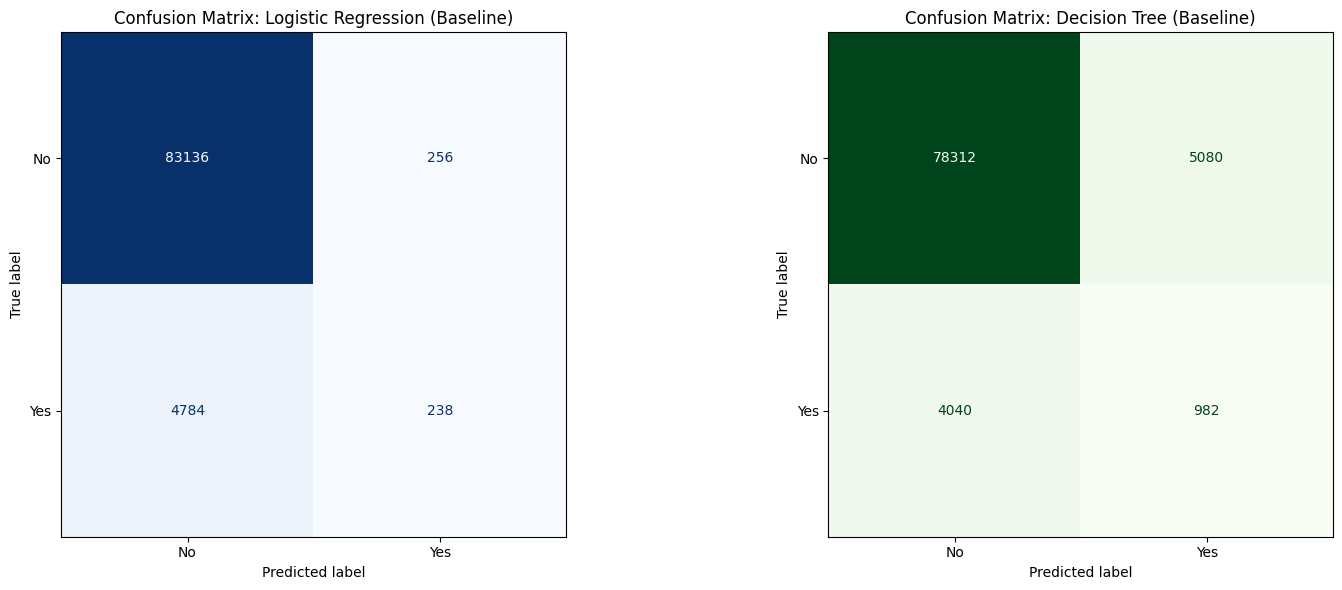

In [8]:
# Create subplots to compare both models side-by-side
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# 1. Confusion Matrix: Logistic Regression
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_log, 
    ax=axes[0], 
    cmap='Blues', 
    colorbar=False
)
axes[0].set_title("Confusion Matrix: Logistic Regression (Baseline)")

# 2. Confusion Matrix: Decision Tree
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_tree, 
    ax=axes[1], 
    cmap='Greens', 
    colorbar=False
)
axes[1].set_title("Confusion Matrix: Decision Tree (Baseline)")

plt.tight_layout()
plt.show()